**Nessa segunda prática o objetivo é simular uma fila de tarefas onde cada consumidor (Worker) vai realizar sua atividade em seu devido tempo, simulando situações reais onde nao é possivel realizar atividades complexas, como numa requisição de HTTP que tem tempo de duracao curto.**

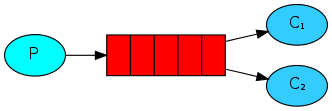

In [ ]:
#!/usr/bin/env python
import pika
import sys
                                                 #produtor das tasks
connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.queue_declare(queue='task_queue', durable=True)

message = ' '.join(sys.argv[1:]) or "Hello World!"
channel.basic_publish(
    exchange='',
    routing_key='task_queue',
    body=message,
    properties=pika.BasicProperties(
        delivery_mode=pika.spec.PERSISTENT_DELIVERY_MODE,
    ))
print(" [x] Sent %r" % message)
connection.close()

In [ ]:
#!/usr/bin/env python
import pika
import time
                                                    #worker1
connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.queue_declare(queue='task_queue', durable=True)
print(' [*] Waiting for messages. To exit press CTRL+C')


def callback(ch, method, properties, body):
    print(" [x] Received %r" % body.decode())
    time.sleep(body.count(b'.'))
    print(" [x] Done")
    ch.basic_ack(delivery_tag=method.delivery_tag)


channel.basic_qos(prefetch_count=1)
channel.basic_consume(queue='task_queue', on_message_callback=callback)

channel.start_consuming()

In [ ]:
#!/usr/bin/env python
import pika
import time
                                                    #worker2
connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.queue_declare(queue='task_queue', durable=True)
print(' [*] Waiting for messages. To exit press CTRL+C')


def callback(ch, method, properties, body):
    print(" [x] Received %r" % body.decode())
    time.sleep(body.count(b'.'))
    print(" [x] Done")
    ch.basic_ack(delivery_tag=method.delivery_tag)


channel.basic_qos(prefetch_count=1)
channel.basic_consume(queue='task_queue', on_message_callback=callback)

channel.start_consuming()

**outra forma de fazer o mesmo procedimento é usando o comando do python no próprio bash, como veremos a seguir.**.. 

In [ ]:
!python3 /inf016/atv2/send.py

In [ ]:
!python3 /inf016/atv2/worker1.py

In [ ]:
!python3 /inf016/atv2/worker2.py